In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.metrics import r2_score

In [3]:
#importing data
data = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Cleaning and Preparing data

In [7]:
# Keeping a copy of data
data_copy = data.copy()

In [8]:
# Fetching only car company name
data['CarName'] = data['CarName'].apply(lambda x: x.split()[0])

In [9]:
data['CarName'].value_counts().sort_index(ascending=False)

vw              2
volvo          11
volkswagen      9
vokswagen       1
toyouta         1
toyota         31
subaru         12
saab            6
renault         2
porsche         4
porcshce        1
plymouth        7
peugeot        11
nissan         17
mitsubishi     13
mercury         1
mazda          15
maxda           2
jaguar          3
isuzu           4
honda          13
dodge           9
chevrolet       3
buick           8
bmw             8
audi            7
alfa-romero     3
Nissan          1
Name: CarName, dtype: int64

In [10]:
data['CarName'] = data['CarName'].str.lower().map({'vw':'volkswagen', 'vokswagen':'volkswagen','volkswagen':'volkswagen',
                                'volvo':'volvo', 'toyota':'toyota', 'toyouta':'toyota','subaru':'subaru',
                                'saab':'saab', 'renault':'renault', 'porsche':'porsche', 'porcshce':'porsche',
                                'plymouth':'plymouth', 'peugeot':'peugeot', 'nissan':'nissan', 'mitsubishi': 'mitsubishi',
                                'mercury': 'mercury', 'mazda': 'mazda', 'maxda':'mazda', 'jaguar':'jaguar', 'isuzu': 'isuzu',
                                'honda': 'honda', 'dodge': 'dodge', 'chevrolet': 'chevrolet', 'buick': 'buick', 'bmw': 'bmw',
                                'audi': 'audi', 'alfa-romero': 'alfa-romero'})

In [11]:
data['CarName'].value_counts().sort_index(ascending=False)

volvo          11
volkswagen     12
toyota         32
subaru         12
saab            6
renault         2
porsche         5
plymouth        7
peugeot        11
nissan         18
mitsubishi     13
mercury         1
mazda          17
jaguar          3
isuzu           4
honda          13
dodge           9
chevrolet       3
buick           8
bmw             8
audi            7
alfa-romero     3
Name: CarName, dtype: int64

In [12]:
data['fueltype'].value_counts().sort_index(ascending=False)

gas       185
diesel     20
Name: fueltype, dtype: int64

In [13]:
data['aspiration'].value_counts().sort_index(ascending=False)

turbo     37
std      168
Name: aspiration, dtype: int64

In [14]:
data['doornumber'].value_counts().sort_index(ascending=False)

two      90
four    115
Name: doornumber, dtype: int64

In [15]:
data['carbody'].value_counts().sort_index(ascending=False)

wagon          25
sedan          96
hatchback      70
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [16]:
data['drivewheel'].value_counts().sort_index(ascending=False)

rwd     76
fwd    120
4wd      9
Name: drivewheel, dtype: int64

In [17]:
data['enginelocation'].value_counts().sort_index(ascending=False)

rear       3
front    202
Name: enginelocation, dtype: int64

In [18]:
data['enginetype'].value_counts().sort_index(ascending=False)

rotor      4
ohcv      13
ohcf      15
ohc      148
l         12
dohcv      1
dohc      12
Name: enginetype, dtype: int64

In [19]:
data['cylindernumber'].value_counts().sort_index(ascending=False)

two         4
twelve      1
three       1
six        24
four      159
five       11
eight       5
Name: cylindernumber, dtype: int64

In [20]:
data['fuelsystem'].value_counts().sort_index(ascending=False)

spfi     1
spdi     9
mpfi    94
mfi      1
idi     20
4bbl     3
2bbl    66
1bbl    11
Name: fuelsystem, dtype: int64

In [21]:
# Droping carId since it's unique variable and does not add any value in linear model
data.drop('car_ID', axis=1, inplace= True)

In [22]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Visualize Numeric Data

In [23]:
numericColumn = data.describe().columns

In [24]:
firstHalf = list(numericColumn[0:7])
firstHalf.append('price')

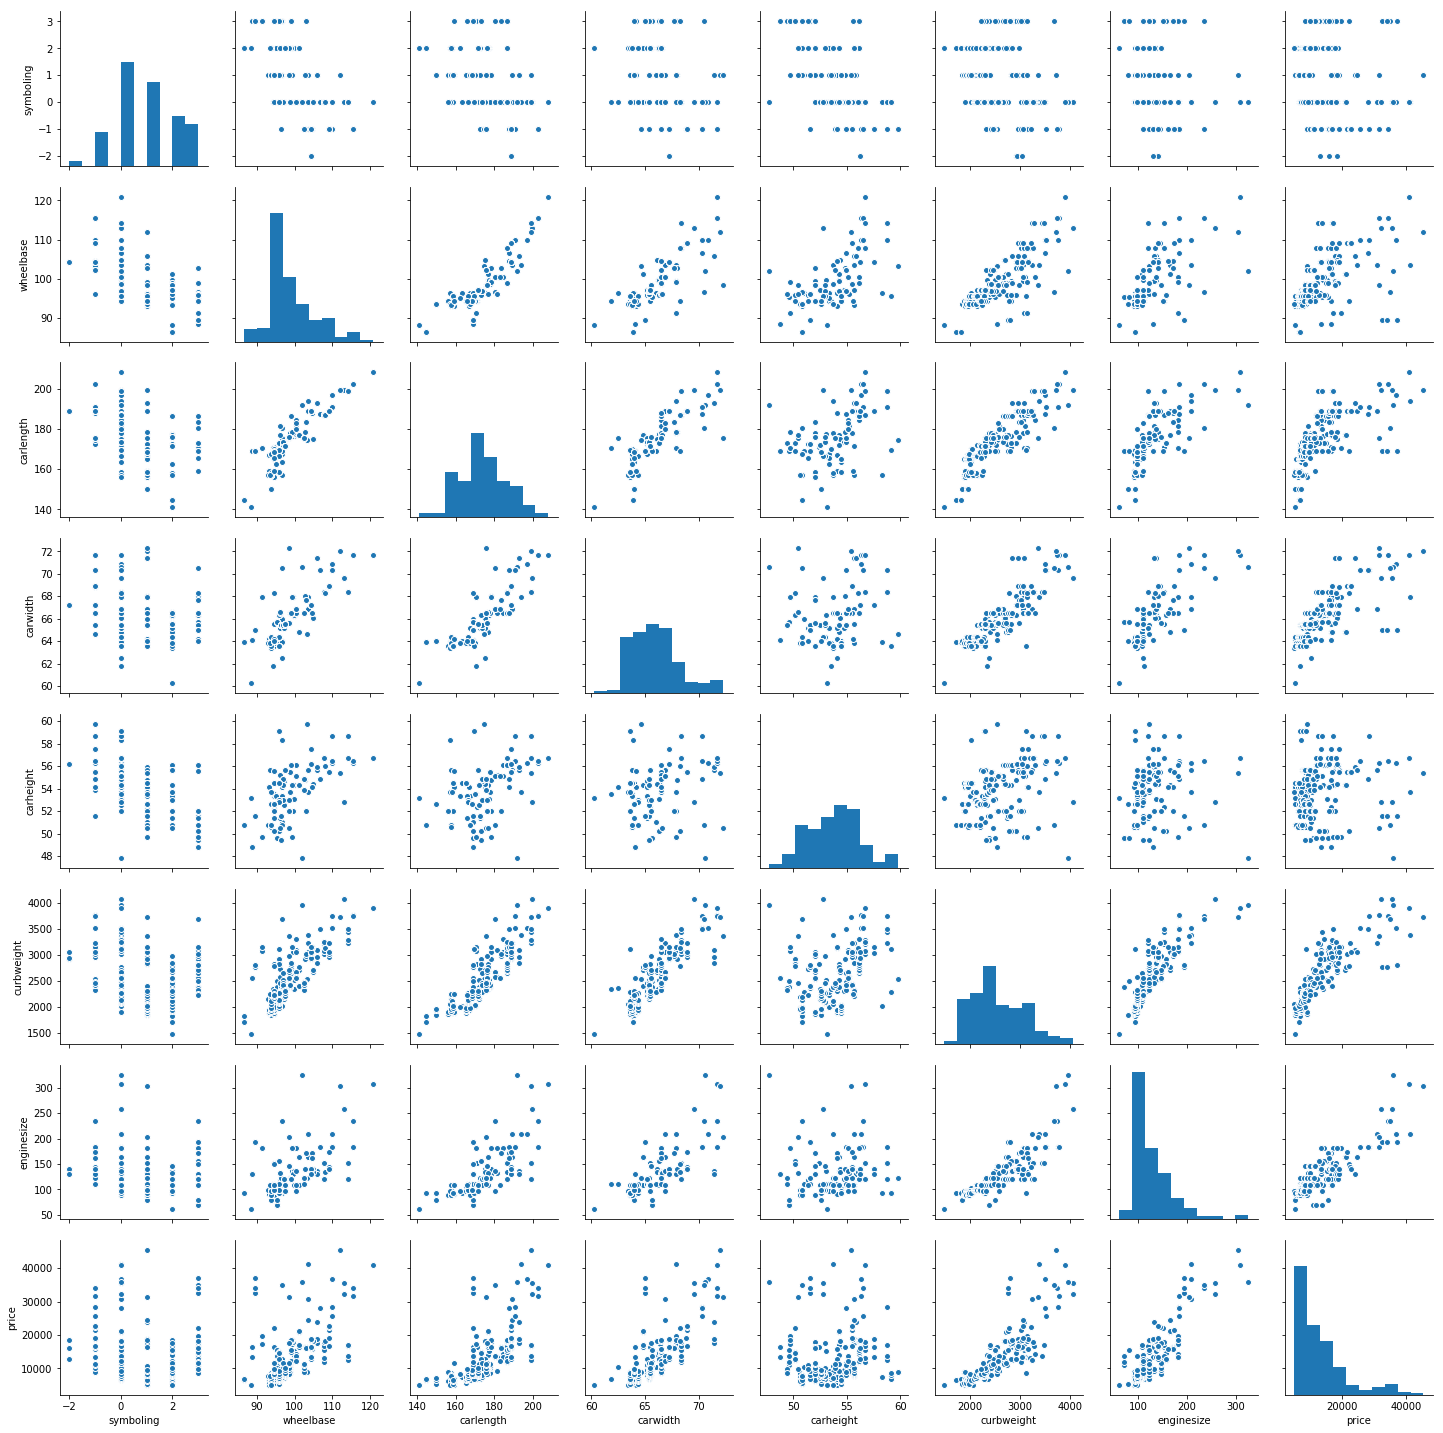

In [25]:
sns.pairplot(data.loc[ : , firstHalf ])

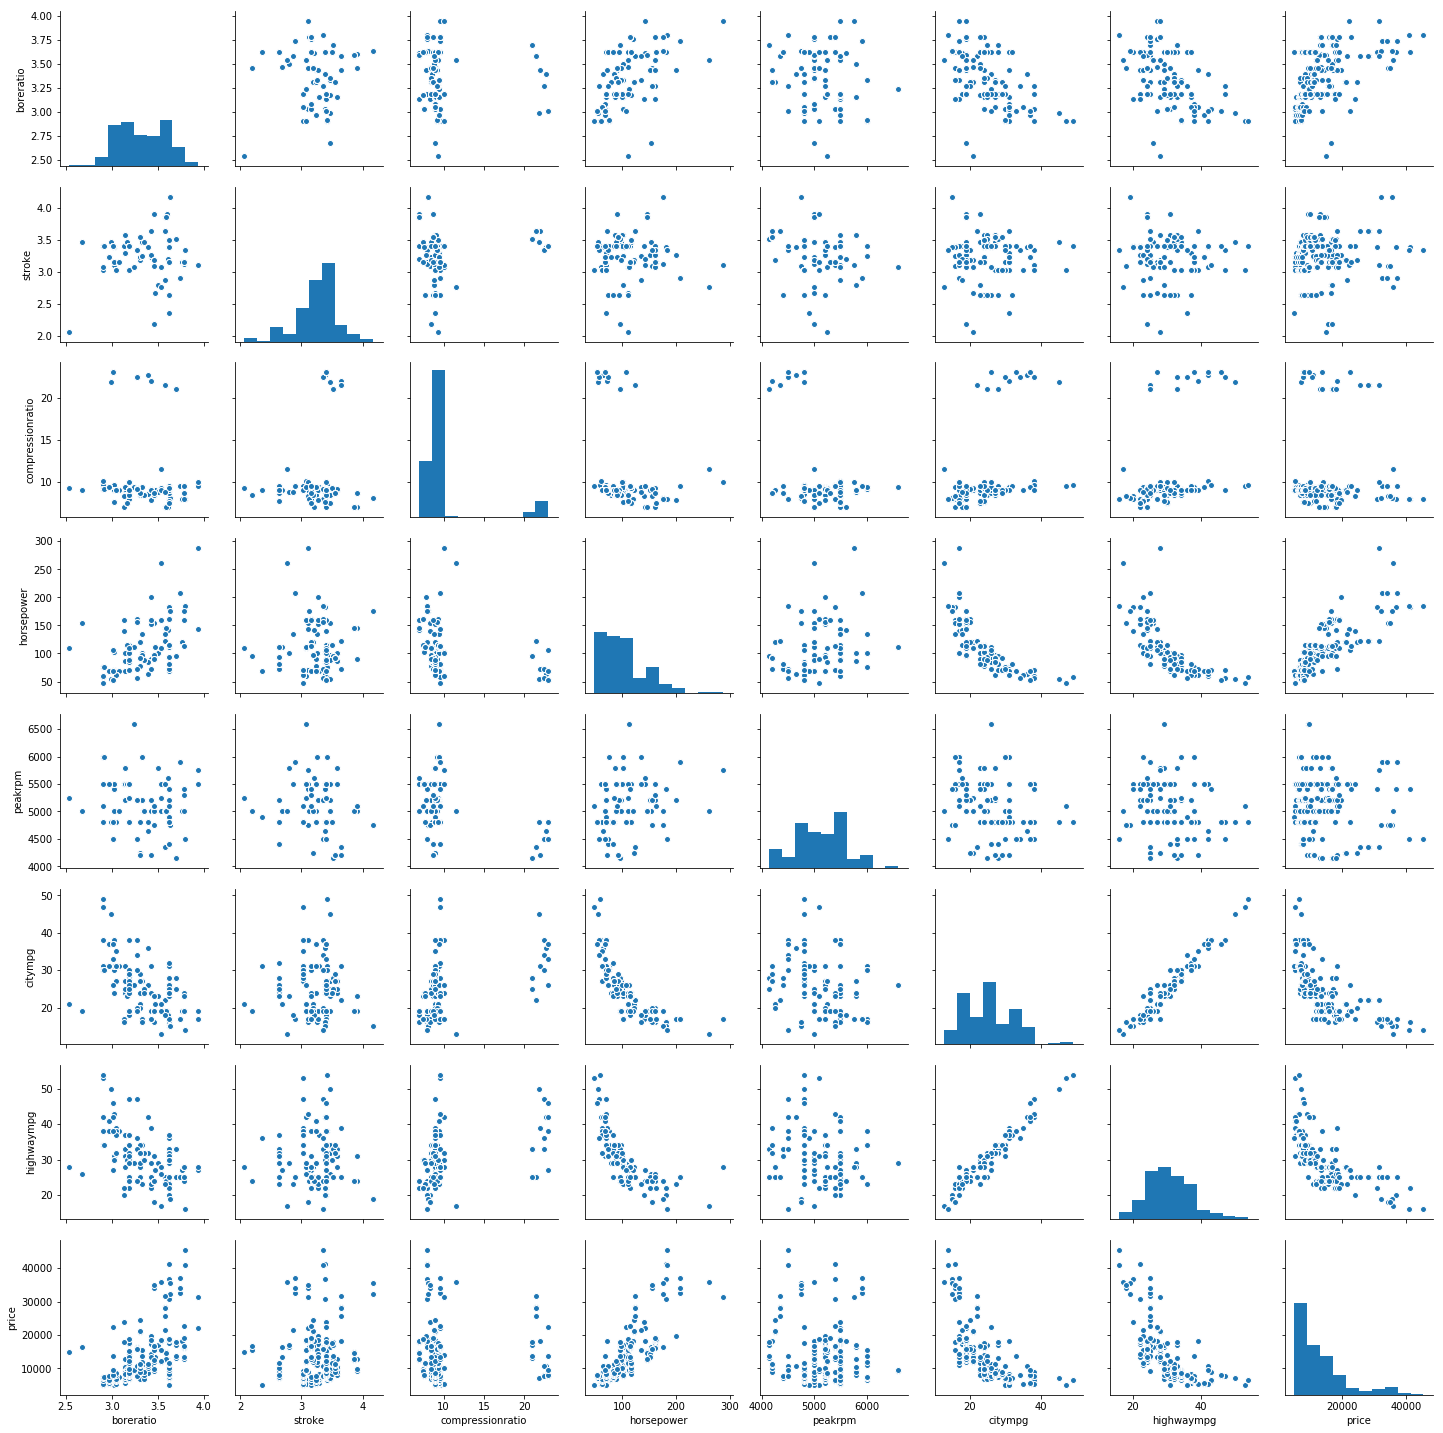

In [26]:
sns.pairplot(data.loc[ : , numericColumn[7:] ])

#### There are many variables which are in linear relationship with price like curb weight, engine size, horse power and car weight, hence, linear regression model could be a good fit for this data 

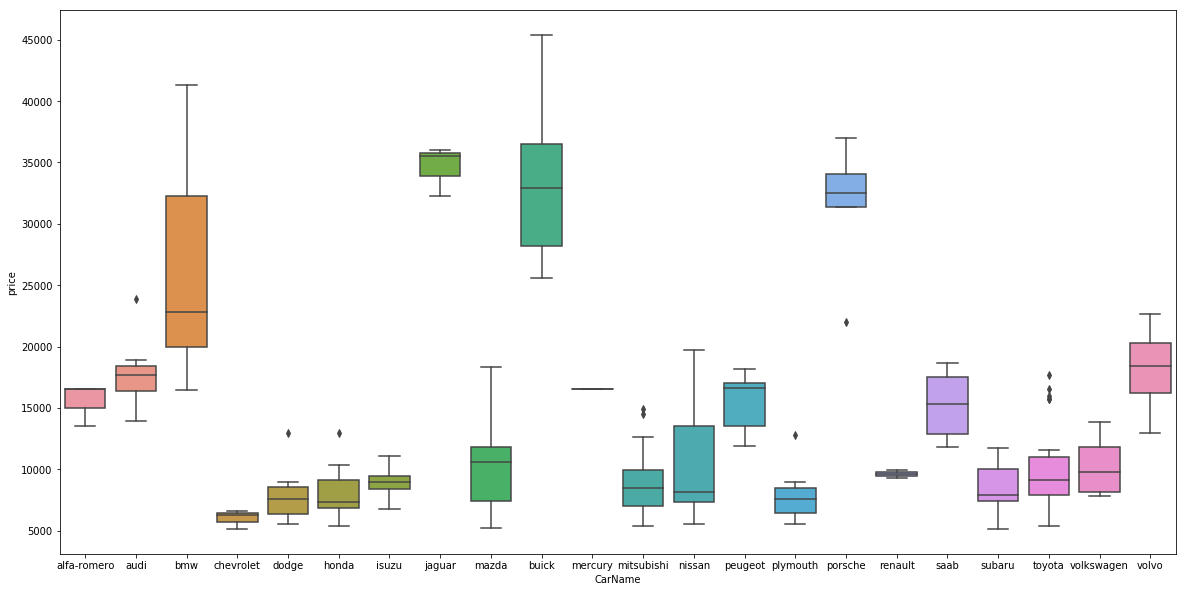

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='CarName', y='price', data= data)

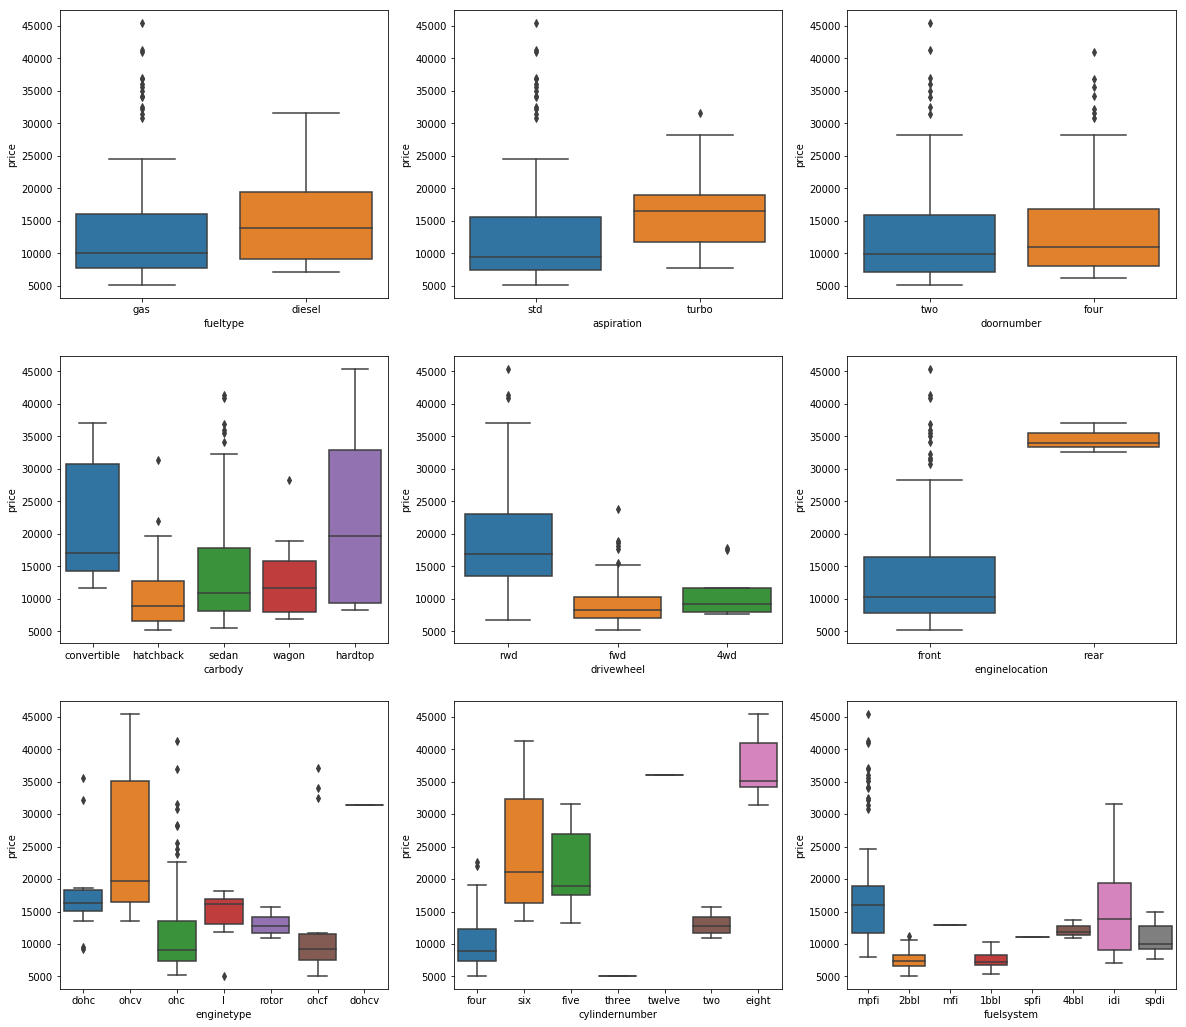

In [28]:
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y='price', data= data)

plt.subplot(3,3,2)
sns.boxplot(x='aspiration', y='price', data= data)

plt.subplot(3,3,3)
sns.boxplot(x='doornumber', y='price', data= data)

plt.subplot(3,3,4)
sns.boxplot(x='carbody', y='price', data= data)

plt.subplot(3,3,5)
sns.boxplot(x='drivewheel', y='price', data= data)

plt.subplot(3,3,6)
sns.boxplot(x='enginelocation', y='price', data= data)

plt.subplot(3,3,7)
sns.boxplot(x='enginetype', y='price', data= data)

plt.subplot(3,3,8)
sns.boxplot(x='cylindernumber', y='price', data= data)

plt.subplot(3,3,9)
sns.boxplot(x='fuelsystem', y='price', data= data)

#### There are some categories which are affecting the car price like car company, drive wheel, engine location and cylinder number

## Create dummy variable for categorical columns

In [29]:
# Keeping a copy of data
data_copy = data.copy()

In [30]:
def replaceWithDummy(columnName, data):
    data = data
    dummy_var = pd.get_dummies(data[columnName], drop_first= True, prefix=columnName)
    data = pd.concat([data, dummy_var], axis=1)
    data.drop(columnName, axis=1, inplace=True)
    return data

In [31]:
cat_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
               'enginetype','cylindernumber', 'fuelsystem']

In [32]:
for columnName in cat_columns:
    data = replaceWithDummy(columnName, data)

In [33]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


### Spliting data into training and testing data

In [34]:
df_train, df_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [35]:
df_train.shape

(143, 65)

In [36]:
df_test.shape

(62, 65)

## Standardisation of numeric data

In [37]:
scaler = MinMaxScaler()

In [38]:
numericColumn = list(numericColumn)
#numericColumn.remove('price')
numericColumn

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [39]:
df_train[numericColumn].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,1,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0
125,3,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,5500,19,27,22018.0
166,1,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,6600,26,29,9538.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
199,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0


In [40]:
df_train[numericColumn] = scaler.fit_transform(df_train[numericColumn])

In [41]:
df_train[numericColumn].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
y_train = df_train.pop('price')
X_train = df_train

In [43]:
X_train.shape

(143, 64)

In [44]:
df_test[numericColumn].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738.0
186,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495.0
59,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845.0
165,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298.0
140,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603.0


In [45]:
df_test[numericColumn] = scaler.transform(df_test[numericColumn])

In [46]:
df_test[numericColumn].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855


In [47]:
y_test = df_test.pop('price')
X_test = df_test

In [48]:
X_test.shape

(62, 64)

## Creating Model 

#### First using RFE to get top 20 variables from tha data

In [49]:
linearModel = LinearRegression()

In [50]:
linearModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
rfe = RFE(linearModel, 20)

In [52]:
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 36),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 27),
 ('highwaympg', False, 16),
 ('CarName_audi', False, 25),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 26),
 ('CarName_chevrolet', False, 13),
 ('CarName_dodge', False, 10),
 ('CarName_honda', False, 12),
 ('CarName_isuzu', False, 39),
 ('CarName_jaguar', False, 17),
 ('CarName_mazda', False, 32),
 ('CarName_mercury', False, 43),
 ('CarName_mitsubishi', False, 3),
 ('CarName_nissan', False, 31),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 9),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 38),
 ('CarName_saab', True, 1),
 ('CarName_subaru', True, 1),
 ('CarName_toyota', False, 34),
 ('CarName_volkswagen', False, 33),


In [54]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'CarName_saab',
       'CarName_subaru', 'CarName_volvo', 'enginelocation_rear',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

### Building the model using statsmodel

In [55]:
X_train_rfe = X_train[col]

In [56]:
X_train_sm = sm.add_constant(X_train_rfe)

In [57]:
lm_sm = sm.OLS(y_train, X_train_sm).fit()

In [58]:
#Let's see the summary of our linear model
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.19e-71
Time:                        23:14:41   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

##### variable CarName_subaru is insignificant and hence dropping it

In [59]:
X_train_sm = X_train_sm.drop('CarName_subaru', axis = 1)

In [60]:
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.19e-71
Time:                        23:14:51   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

##### variable enginetype_ohcf  is insignificant and hence removing it

In [61]:
X_train_sm = X_train_sm.drop('enginetype_ohcf', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.89e-71
Time:                        23:14:53   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [62]:
X_train_vif = X_train_sm.drop('const', axis = 1)

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
17,cylindernumber_two,inf
15,cylindernumber_three,inf
12,enginetype_rotor,inf
11,enginetype_l,inf
6,CarName_peugeot,inf
2,enginesize,97.010000
1,curbweight,59.180000
0,carwidth,43.710000
3,boreratio,37.470000
4,stroke,31.180000


#### Removing cylindernumber_two since it's highly colinear with other variables

In [64]:
X_train_sm = X_train_sm.drop('cylindernumber_two', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.89e-71
Time:                        23:14:58   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [65]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,enginetype_l,inf
15,cylindernumber_three,inf
6,CarName_peugeot,inf
2,enginesize,97.010000
1,curbweight,59.180000
0,carwidth,43.710000
3,boreratio,37.470000
4,stroke,31.180000
14,cylindernumber_four,26.440000
12,enginetype_rotor,4.550000


#### Removing enginetype_l since it's highly colinear with other variables

In [66]:
X_train_sm = X_train_sm.drop('enginetype_l', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.89e-71
Time:                        23:15:04   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [67]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,enginesize,97.01
1,curbweight,59.18
0,carwidth,43.71
3,boreratio,37.47
4,stroke,31.18
13,cylindernumber_four,26.44
11,enginetype_rotor,4.55
12,cylindernumber_five,3.14
15,cylindernumber_twelve,2.95
7,CarName_porsche,2.03


##### Removing enginesize since it's highly colinear with other variables

In [68]:
X_train_sm = X_train_sm.drop('enginesize', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     86.57
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.59e-59
Time:                        23:15:08   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -347.7
Df Residuals:                     127   BIC:                            -300.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [69]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,40.84
1,curbweight,40.74
2,boreratio,22.54
3,stroke,17.42
12,cylindernumber_four,10.23
6,CarName_porsche,1.98
11,cylindernumber_five,1.76
9,enginelocation_rear,1.62
5,CarName_peugeot,1.52
10,enginetype_rotor,1.37


##### Removing stroke since it's insignificant and highly colinear with other variables

In [70]:
X_train_sm = X_train_sm.drop('stroke', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.22
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           5.46e-60
Time:                        23:15:12   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -349.3
Df Residuals:                     128   BIC:                            -304.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [71]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,36.79
1,curbweight,34.00
2,boreratio,17.68
11,cylindernumber_four,5.22
5,CarName_porsche,1.97
10,cylindernumber_five,1.75
8,enginelocation_rear,1.59
4,CarName_peugeot,1.24
3,CarName_bmw,1.23
9,enginetype_rotor,1.23


##### Removing boreratio since it's insignificant and highly colinear with other variables

In [72]:
X_train_sm = X_train_sm.drop('boreratio', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     98.66
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.30e-60
Time:                        23:15:14   Log-Likelihood:                 188.03
No. Observations:                 143   AIC:                            -348.1
Df Residuals:                     129   BIC:                            -306.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1501      0.041     -3.669      0.000      -0.231      -0.069
carwidth                  0.3474      0.076      4.581      0.000       0.197       0.497
curbweight                0.5541      0.069      8.066      0.000       0.418       0.690
CarName_bmw               0.2546      0.032      8.053      0.000       0.192       0.317
CarName_peugeot          -0.1327      0.032     -4.121      0.000      -0.196      -0.069
CarName_porsche           0.1357      0.053      2.543      0.012       0.030       0.241
CarName_saab              0.0186      0.041      0.450      0.654      -0.063       0.101
CarName_volvo             0.0013      0.031      0.040      0.968      -0.060       0.063
enginelocation_rear       0.4045      0.090      4.475      0.000       0.226       0.583
enginetype_rotor          0.0136      0.041      0.330      0.742      -0.068       0.095
cylindernumber_five      -0.0116      0.031     -0.379      0.705      -0.072       0.049
cylindernumber_four      -0.0382      0.026     -1.450      0.149      -0.090       0.014
cylindernumber_three      0.1510      0.080      1.895      0.060      -0.007       0.309
cylindernumber_twelve     0.1759      0.072      2.439      0.016       0.033       0.319
==============================================================================
Omnibus:                       20.535   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.444
Skew:                           0.673   Prob(JB):                     1.22e-08
Kurtosis:                       5.074   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,36.74
1,curbweight,27.12
10,cylindernumber_four,3.40
4,CarName_porsche,1.77
9,cylindernumber_five,1.75
7,enginelocation_rear,1.58
3,CarName_peugeot,1.24
2,CarName_bmw,1.19
6,CarName_volvo,1.16
8,enginetype_rotor,1.14


##### Removing CarName_volvo since it's insignificant

In [74]:
X_train_sm = X_train_sm.drop('CarName_volvo', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.16e-61
Time:                        23:15:18   Log-Likelihood:                 188.02
No. Observations:                 143   AIC:                            -350.0
Df Residuals:                     130   BIC:                            -311.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1505      0.040     -3.804      0.000      -0.229      -0.072
carwidth                  0.3480      0.074      4.690      0.000       0.201       0.495
curbweight                0.5543      0.068      8.137      0.000       0.420       0.689
CarName_bmw               0.2546      0.031      8.100      0.000       0.192       0.317
CarName_peugeot          -0.1330      0.031     -4.284      0.000      -0.194      -0.072
CarName_porsche           0.1354      0.053      2.575      0.011       0.031       0.239
CarName_saab              0.0184      0.041      0.450      0.654      -0.063       0.100
enginelocation_rear       0.4048      0.090      4.519      0.000       0.228       0.582
enginetype_rotor          0.0137      0.041      0.332      0.740      -0.068       0.095
cylindernumber_five      -0.0118      0.030     -0.392      0.696      -0.071       0.048
cylindernumber_four      -0.0380      0.026     -1.466      0.145      -0.089       0.013
cylindernumber_three      0.1514      0.079      1.921      0.057      -0.004       0.307
cylindernumber_twelve     0.1756      0.071      2.461      0.015       0.034       0.317
==============================================================================
Omnibus:                       20.402   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.104
Skew:                           0.670   Prob(JB):                     1.45e-08
Kurtosis:                       5.065   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,36.33
1,curbweight,27.11
9,cylindernumber_four,3.33
4,CarName_porsche,1.75
8,cylindernumber_five,1.68
6,enginelocation_rear,1.58
3,CarName_peugeot,1.21
2,CarName_bmw,1.17
7,enginetype_rotor,1.13
11,cylindernumber_twelve,1.09


##### Removing enginetype_rotor since it's insignificant

In [76]:
X_train_sm = X_train_sm.drop('enginetype_rotor', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.05e-62
Time:                        23:15:21   Log-Likelihood:                 187.96
No. Observations:                 143   AIC:                            -351.9
Df Residuals:                     131   BIC:                            -316.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1442      0.035     -4.166      0.000      -0.213      -0.076
carwidth                  0.3489      0.074      4.721      0.000       0.203       0.495
curbweight                0.5477      0.065      8.437      0.000       0.419       0.676
CarName_bmw               0.2524      0.031      8.241      0.000       0.192       0.313
CarName_peugeot          -0.1308      0.030     -4.327      0.000      -0.191      -0.071
CarName_porsche           0.1348      0.052      2.573      0.011       0.031       0.238
CarName_saab              0.0196      0.041      0.480      0.632      -0.061       0.100
enginelocation_rear       0.4021      0.089      4.522      0.000       0.226       0.578
cylindernumber_five      -0.0146      0.029     -0.506      0.614      -0.071       0.042
cylindernumber_four      -0.0426      0.022     -1.953      0.053      -0.086       0.001
cylindernumber_three      0.1451      0.076      1.904      0.059      -0.006       0.296
cylindernumber_twelve     0.1749      0.071      2.460      0.015       0.034       0.315
==============================================================================
Omnibus:                       20.104   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.674
Skew:                           0.659   Prob(JB):                     1.79e-08
Kurtosis:                       5.061   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,33.93
1,curbweight,26.33
8,cylindernumber_four,3.08
4,CarName_porsche,1.72
7,cylindernumber_five,1.60
6,enginelocation_rear,1.58
3,CarName_peugeot,1.21
2,CarName_bmw,1.16
10,cylindernumber_twelve,1.09
5,CarName_saab,1.05


##### Removing CarName_saab since it's insignificant

In [78]:
X_train_sm = X_train_sm.drop('CarName_saab', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.95e-63
Time:                        23:15:24   Log-Likelihood:                 187.84
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     132   BIC:                            -321.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1471      0.034     -4.329      0.000      -0.214      -0.080
carwidth                  0.3500      0.074      4.753      0.000       0.204       0.496
curbweight                0.5513      0.064      8.573      0.000       0.424       0.678
CarName_bmw               0.2523      0.031      8.263      0.000       0.192       0.313
CarName_peugeot          -0.1331      0.030     -4.471      0.000      -0.192      -0.074
CarName_porsche           0.1335      0.052      2.560      0.012       0.030       0.237
enginelocation_rear       0.4040      0.089      4.562      0.000       0.229       0.579
cylindernumber_five      -0.0148      0.029     -0.515      0.608      -0.071       0.042
cylindernumber_four      -0.0406      0.021     -1.902      0.059      -0.083       0.002
cylindernumber_three      0.1480      0.076      1.954      0.053      -0.002       0.298
cylindernumber_twelve     0.1734      0.071      2.448      0.016       0.033       0.313
==============================================================================
Omnibus:                       19.502   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.087
Skew:                           0.646   Prob(JB):                     3.96e-08
Kurtosis:                       5.013   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,33.85
1,curbweight,26.16
7,cylindernumber_four,3.07
4,CarName_porsche,1.72
6,cylindernumber_five,1.60
5,enginelocation_rear,1.58
3,CarName_peugeot,1.20
2,CarName_bmw,1.16
9,cylindernumber_twelve,1.09
8,cylindernumber_three,1.00


##### Removing cylindernumber_five since it's insignificant

In [80]:
X_train_sm = X_train_sm.drop('cylindernumber_five', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.79e-64
Time:                        23:15:28   Log-Likelihood:                 187.69
No. Observations:                 143   AIC:                            -355.4
Df Residuals:                     133   BIC:                            -325.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1486      0.034     -4.400      0.000      -0.215      -0.082
carwidth                  0.3377      0.069      4.863      0.000       0.200       0.475
curbweight                0.5592      0.062      8.982      0.000       0.436       0.682
CarName_bmw               0.2551      0.030      8.525      0.000       0.196       0.314
CarName_peugeot          -0.1323      0.030     -4.463      0.000      -0.191      -0.074
CarName_porsche           0.1386      0.051      2.713      0.008       0.038       0.240
enginelocation_rear       0.4014      0.088      4.553      0.000       0.227       0.576
cylindernumber_four      -0.0370      0.020     -1.840      0.068      -0.077       0.003
cylindernumber_three      0.1495      0.075      1.980      0.050       0.000       0.299
cylindernumber_twelve     0.1779      0.070      2.538      0.012       0.039       0.316
==============================================================================
Omnibus:                       20.915   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.606
Skew:                           0.680   Prob(JB):                     6.82e-09
Kurtosis:                       5.112   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,28.32
1,curbweight,24.79
6,cylindernumber_four,2.33
4,CarName_porsche,1.65
5,enginelocation_rear,1.57
3,CarName_peugeot,1.19
2,CarName_bmw,1.13
8,cylindernumber_twelve,1.07
7,cylindernumber_three,1.00


##### Removing cylindernumber_four since it's insignificant

In [82]:
X_train_sm = X_train_sm.drop('cylindernumber_four', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.17e-65
Time:                        23:15:31   Log-Likelihood:                 185.90
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     134   BIC:                            -327.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2024      0.017    -11.914      0.000      -0.236      -0.169
carwidth                  0.3644      0.069      5.318      0.000       0.229       0.500
curbweight                0.5950      0.060      9.973      0.000       0.477       0.713
CarName_bmw               0.2681      0.029      9.134      0.000       0.210       0.326
CarName_peugeot          -0.1576      0.027     -5.947      0.000      -0.210      -0.105
CarName_porsche           0.1297      0.051      2.528      0.013       0.028       0.231
enginelocation_rear       0.4361      0.087      5.018      0.000       0.264       0.608
cylindernumber_three      0.2033      0.070      2.896      0.004       0.064       0.342
cylindernumber_twelve     0.1746      0.071      2.471      0.015       0.035       0.314
==============================================================================
Omnibus:                       17.329   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.535
Skew:                           0.613   Prob(JB):                     1.05e-06
Kurtosis:                       4.766   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,curbweight,22.23
0,carwidth,21.24
4,CarName_porsche,1.60
5,enginelocation_rear,1.56
3,CarName_peugeot,1.18
2,CarName_bmw,1.11
7,cylindernumber_twelve,1.06
6,cylindernumber_three,1.00


##### Removing curbweight since it's highly colinear with other variables

In [84]:
X_train_sm = X_train_sm.drop('curbweight', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     98.29
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.83e-50
Time:                        23:15:34   Log-Likelihood:                 146.20
No. Observations:                 143   AIC:                            -276.4
Df Residuals:                     135   BIC:                            -252.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2355      0.022    -10.744      0.000      -0.279      -0.192
carwidth                  0.9502      0.046     20.492      0.000       0.859       1.042
CarName_bmw               0.3311      0.038      8.785      0.000       0.257       0.406
CarName_peugeot          -0.1171      0.034     -3.399      0.001      -0.185      -0.049
CarName_porsche           0.0401      0.066      0.604      0.547      -0.091       0.171
enginelocation_rear       0.6219      0.112      5.572      0.000       0.401       0.843
cylindernumber_three      0.2364      0.092      2.563      0.011       0.054       0.419
cylindernumber_twelve     0.2730      0.092      2.967      0.004       0.091       0.455
==============================================================================
Omnibus:                       29.302   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.187
Skew:                           0.834   Prob(JB):                     1.56e-15
Kurtosis:                       5.943   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,CarName_porsche,1.58
4,enginelocation_rear,1.51
0,carwidth,1.27
2,CarName_peugeot,1.13
1,CarName_bmw,1.06
6,cylindernumber_twelve,1.03
5,cylindernumber_three,1.00


###### Removing CarName_porsche since it's insignificant

In [86]:
X_train_sm = X_train_sm.drop('CarName_porsche', axis = 1)
# Rebuilding the model
lm_sm = sm.OLS(y_train, X_train_sm).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.36e-51
Time:                        23:15:37   Log-Likelihood:                 146.01
No. Observations:                 143   AIC:                            -278.0
Df Residuals:                     136   BIC:                            -257.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2383      0.021    -11.148      0.000      -0.281      -0.196
carwidth                  0.9579      0.044     21.536      0.000       0.870       1.046
CarName_bmw               0.3298      0.038      8.786      0.000       0.256       0.404
CarName_peugeot          -0.1194      0.034     -3.500      0.001      -0.187      -0.052
enginelocation_rear       0.6618      0.090      7.372      0.000       0.484       0.839
cylindernumber_three      0.2392      0.092      2.603      0.010       0.057       0.421
cylindernumber_twelve     0.2692      0.092      2.939      0.004       0.088       0.450
==============================================================================
Omnibus:                       27.436   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.297
Skew:                           0.781   Prob(JB):                     1.80e-14
Kurtosis:                       5.860   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X_train_vif = X_train_sm.drop('const', axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [VIF(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,1.21
2,CarName_peugeot,1.12
1,CarName_bmw,1.06
5,cylindernumber_twelve,1.03
3,enginelocation_rear,1.01
4,cylindernumber_three,1.00


#### Now the model is looking good with high R^2 and adjusted-R^2 with all variables having low p-value and low VIF(colinear between indepedent variables) values

## Checking Reseduals

In [88]:
y_train_predict = lm_sm.predict(X_train_sm)

Text(0.5,0,'Errors')

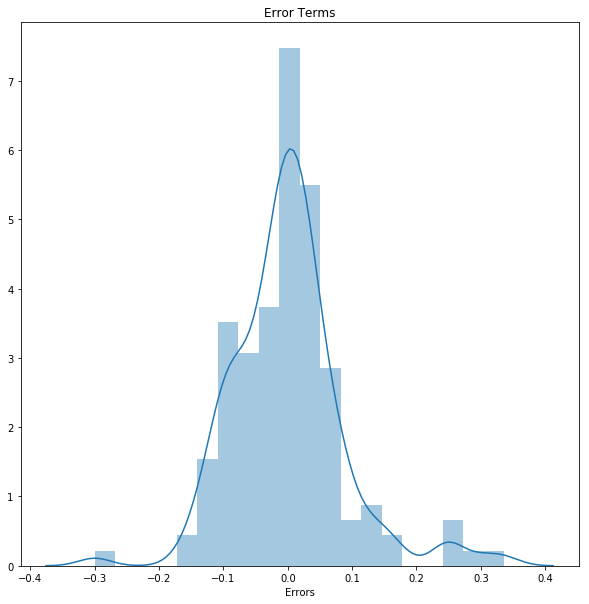

In [89]:
plt.figure(figsize=(10,10))
sns.distplot((y_train-y_train_predict), bins=20)
plt.title('Error Terms')
plt.xlabel('Errors', fontsize=10)

#### Error is normaly distributed which satisfy a liner regression assumption

## Testing model on the test data set

In [90]:
X_test_sm = sm.add_constant(X_test)

In [91]:
X_test_sm = X_test_sm[X_train_sm.columns]

In [92]:
y_test_pred = lm_sm.predict(X_test_sm)

In [93]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7980143104581798

##### This model is able get 0.82 R^2 on testing data which makes it a good model

Text(0,0.5,'y_pred')

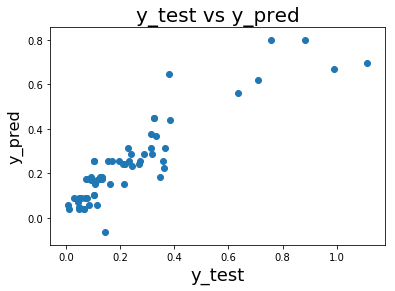

In [94]:
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 